In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from time import sleep

In [2]:
bbh =  ['MRNA', 'AMGN', 'IQV', 'ICLR', 'VRTX', 'GILD', 'REGN', 'ILMN', 'CRL', 'SGEN', 'ILMN', 
            'BIIB', 'TECH', 'BNTX', 'BGNE', 'EXAS', 'ALNY', 'NVAX', 'QGEN', 'GH', 'NTRA', 'BMRN', 
            'INCY', 'TXG', 'NTLA', 'CRSP', 'BBH']
other_etfs = ['SPY', 'IBB', 'XBI', 'ARKG', 'FBT', 'LABU', 'IDNA', 'PBE', 'GNOM', 'BIB', 'SBIO', 'BTEC']
symbols = bbh + other_etfs

In [3]:
data = pd.read_csv('biotech_av_v1.csv', index_col=0)

In [4]:
# transform prices into cumulative returns
data = (data.pct_change()+1).cumprod()
data = data.iloc[1:]
data = data / data.iloc[0]
data

,MRNA,AMGN,IQV,ICLR,VRTX,GILD,REGN,ILMN,CRL,SGEN,...,XBI,ARKG,FBT,LABU,IDNA,PBE,GNOM,BIB,SBIO,BTEC
2020-05-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-05,0.977030,1.023602,1.010667,0.989771,1.028864,0.986168,1.060075,1.006652,1.019443,1.062083,...,1.021691,1.009471,1.014470,1.064748,1.016791,1.020561,1.028979,1.033990,1.027020,1.034521
2020-05-06,0.969307,1.024598,0.999627,0.979152,1.020288,0.965358,1.021557,1.022193,1.038381,1.057011,...,1.026826,1.015056,1.020389,1.081449,1.026119,1.029327,1.033089,1.039737,1.035853,1.032980
2020-05-07,1.053267,1.010480,1.010891,1.016613,1.020099,0.967103,1.033240,1.016742,1.131623,1.048151,...,1.028398,1.020155,1.024204,1.087616,1.042600,1.031619,1.034459,1.040722,1.040010,1.037680
2020-05-08,1.173267,1.016933,1.026779,1.035116,1.026219,0.965607,1.039829,1.005419,1.153307,1.012262,...,1.043383,1.049781,1.036175,1.130781,1.069341,1.043551,1.039323,1.062397,1.049623,1.054575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,4.471683,0.955534,1.884082,1.792820,0.702218,0.894574,1.156546,1.249708,2.819371,1.138803,...,1.326754,1.802033,1.052157,1.408530,1.495238,1.354903,1.487221,1.404598,1.204557,1.423062
2021-11-12,4.578020,0.954767,1.899746,1.860382,0.707582,0.895237,1.164963,1.244160,2.789375,1.149268,...,1.329170,1.797870,1.050316,1.413412,1.500858,1.353733,1.481047,1.407553,1.205339,1.421288
2021-11-15,4.654851,0.944694,1.878338,1.838165,0.705958,0.891523,1.195471,1.229526,2.779472,1.172830,...,1.301334,1.756241,1.047816,1.325540,1.490867,1.338692,1.441946,1.394417,1.175110,1.396785
2021-11-16,4.639208,0.935539,1.995674,1.860512,0.711512,0.887410,1.186280,1.228131,2.852982,1.171097,...,1.307847,1.791503,1.054196,1.349178,1.502419,1.347650,1.457038,1.398030,1.187636,1.406190


In [5]:
data.columns

Index(['MRNA', 'AMGN', 'IQV', 'ICLR', 'VRTX', 'GILD', 'REGN', 'ILMN', 'CRL',
       'SGEN', 'ILMN.1', 'BIIB', 'TECH', 'BNTX', 'BGNE', 'EXAS', 'ALNY',
       'NVAX', 'QGEN', 'GH', 'NTRA', 'BMRN', 'INCY', 'TXG', 'NTLA', 'CRSP',
       'BBH', 'SPY', 'IBB', 'XBI', 'ARKG', 'FBT', 'LABU', 'IDNA', 'PBE',
       'GNOM', 'BIB', 'SBIO', 'BTEC'],
      dtype='object')

In [6]:
# input data
s = ['MRNA', 'AMGN', 'IQV', 'ICLR', 'VRTX', 'GILD', 'REGN', 'ILMN', 'CRL',
     'SGEN', 'ILMN.1', 'BIIB', 'TECH', 'BNTX', 'BGNE', 'EXAS', 'ALNY',
     'NVAX', 'QGEN', 'GH', 'NTRA', 'BMRN', 'INCY', 'TXG', 'NTLA', 'CRSP',
     'SPY', 'IBB', 'XBI', 'ARKG', 'FBT', 'LABU', 'IDNA', 'PBE',
     'GNOM', 'BIB', 'SBIO', 'BTEC']
# target asset
y = ['BBH']

# PCA scree plot

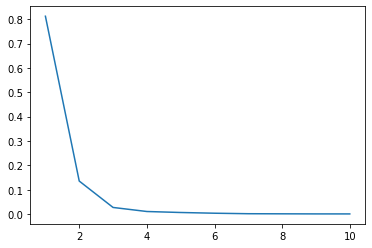

In [7]:
from sklearn.decomposition import PCA

Xtmp = data[s] # select data without the target asset
pca = PCA(n_components=10)
pca.fit(Xtmp)

n_comp = np.arange(1,11)
plt.plot(n_comp, pca.explained_variance_ratio_)

In [8]:
pca.explained_variance_ratio_

array([8.12122960e-01, 1.35439425e-01, 2.70884325e-02, 1.04287168e-02,
       6.36786132e-03, 3.39209482e-03, 1.34305394e-03, 9.38947133e-04,
       6.07863391e-04, 5.34904941e-04])

# Parameter selection

In [9]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from itertools import product

def compute_votes(data, pca_comp, beta, lookback, Cs, gammas, epsilons):
    '''
    compute daily votes of the models with the given parameters
    '''
    # start with equal weights
    weights = np.ones(len(Cs)*len(gammas)*len(epsilons))
    weights = weights/sum(weights) # normalize so that weights sum to 1

    daily_votes = np.zeros(len(data.index))

    for t in range(lookback,len(data.index)-1):
        predictions = []
        for C,gamma,epsilon in product(Cs,gammas,epsilons):
            model = make_pipeline(StandardScaler(), PCA(n_components=pca_comp), 
                                  SVR(C=C, gamma=gamma, epsilon=epsilon))
            X_train = data[s].iloc[t-lookback:t+1].values
            y_train = data[y].iloc[t-lookback:t+1].values.flatten()
            model.fit(X_train,y_train)
            X_test = data[s].iloc[t].values.reshape(1,-1)
            yhat = model.predict(X_test)
            predictions.append(yhat)
        # log all votes
        votes = -np.sign(data[y].iloc[t].values.flatten() - np.array(predictions)) # if price>fair, go short
        final_vote = np.dot(weights,votes)
        daily_votes[t] = final_vote   

        # update weights based on true direction
        true_direction = np.sign((data[y].iloc[t+1] - data[y].iloc[t]).values.flatten()) 
        if final_vote!=true_direction:
            incorrect_votes_ind = np.where(votes!=true_direction)[0]
            weights[incorrect_votes_ind] = beta * weights[incorrect_votes_ind]
            weights = weights/sum(weights)

    return daily_votes

In [10]:
# SVR hyperparameters
Cs = set((0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000))
gammas = set((0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000))
epsilons = set((0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1))

In [13]:
# strategy parameters
betas = [0.1,0.3,0.5,0.7] # betas for downgrading weights
lookbacks = [20] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [14]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['BBH']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['BBH_returns'] = datatmp['BBH'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['BBH_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['BBH_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['BBH_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['BBH_returns']) == np.sign(datatmp['vote'])]['BBH_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['BBH_returns']) != np.sign(datatmp['vote'])]['BBH_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['BBH_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)

In [15]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.1,20.0,1.0,171.0,149.0,0.534375,0.012334,0.009900,0.825008,0.606002,2.170155,-0.016581
1,0.3,20.0,1.0,169.0,151.0,0.528125,0.012239,0.010038,0.682288,0.506248,1.887254,-0.035940
2,0.5,20.0,1.0,167.0,153.0,0.521875,0.012481,0.009803,0.736474,0.544325,1.997112,0.026955
3,0.7,20.0,1.0,162.0,158.0,0.506250,0.012356,0.010016,0.472037,0.355926,1.427114,0.007146


In [16]:
# strategy parameters
betas = [0.5] # betas for downgrading weights
lookbacks = [20] # how many last trading days to include in model training
pca_comps = [1,2,3] # number of principal components to use

In [17]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    
    datatmp = data[['BBH']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['vote'] = daily_votes[lookback+50:]
    datatmp['vote'] = datatmp['vote'].shift()
    datatmp['BBH_returns'] = datatmp['BBH'].pct_change()
    datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['BBH_returns'])
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['BBH_returns']].values) == np.sign(datatmp[['vote']].values)).sum()
    num_losses = (np.sign(datatmp[['BBH_returns']].values) != np.sign(datatmp[['vote']].values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = abs(datatmp[np.sign(datatmp['BBH_returns']) == np.sign(datatmp['vote'])]['BBH_returns']).sum()/num_wins
    avg_loss = abs(datatmp[np.sign(datatmp['BBH_returns']) != np.sign(datatmp['vote'])]['BBH_returns']).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef = np.corrcoef(datatmp['BBH_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset':corrcoef}, 
                              ignore_index=True)

In [18]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset
0,0.5,20.0,1.0,167.0,153.0,0.521875,0.012481,0.009803,0.736474,0.544325,1.997112,0.026955
1,0.5,20.0,2.0,160.0,160.0,0.500000,0.011115,0.011286,-0.058148,-0.046081,-0.092470,0.109465
2,0.5,20.0,3.0,151.0,169.0,0.471875,0.011234,0.011170,-0.200767,-0.161785,-0.649623,0.001639


# Model: beta=0.5, pca_comp=1

In [84]:
daily_votes = compute_votes(data, pca_comp=1, beta=0.5, lookback=20, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['BBH']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['vote'] = daily_votes[lookback+50:]
datatmp['vote'] = datatmp['vote'].shift()
datatmp['BBH_returns'] = datatmp['BBH'].pct_change()
datatmp['alg_returns'] = (np.sign(datatmp['vote']) * datatmp['BBH_returns'])
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

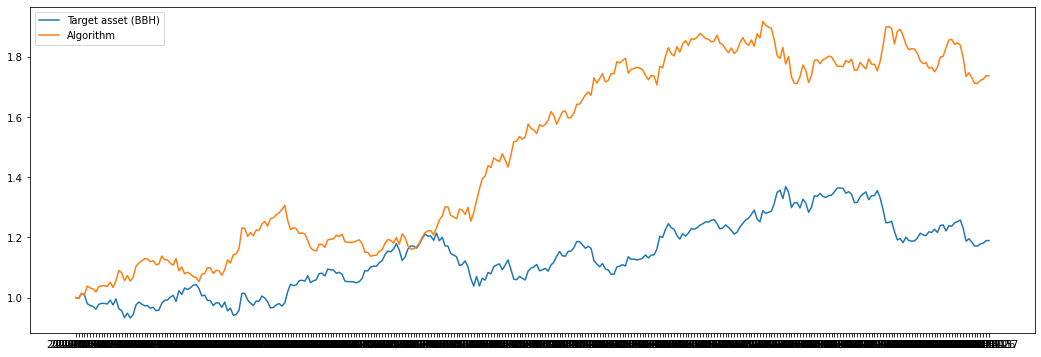

In [85]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['BBH']]/datatmp[['BBH']].iloc[0], label='Target asset (BBH)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

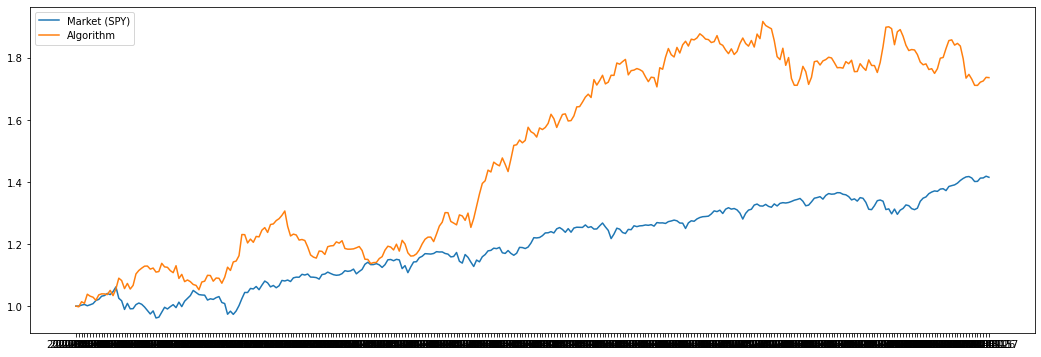

In [86]:
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

In [87]:
# create an indicator of positions change
# -1 when we change position from long to short or vice versa
datatmp['pos_change'] = np.sign(datatmp['vote'])*np.sign(datatmp['vote'].shift())
datatmp['pos_change'][datatmp['pos_change']!=-1]=0
# subtract 0.2% fee from the return when we change position
datatmp['alg_returns_tc'] = datatmp['alg_returns'] + 0.002 * datatmp['pos_change']
# calculate cumulative returns with transaction costs
datatmp['alg_cumret_tc'] = np.cumprod(datatmp['alg_returns_tc']+1)

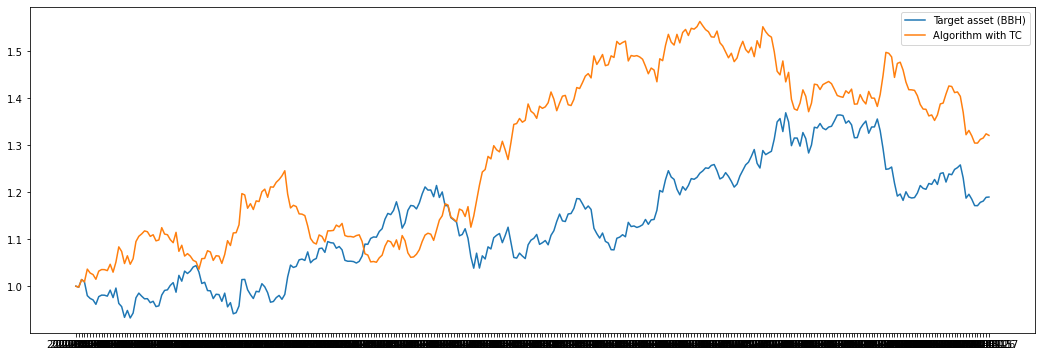

In [88]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['BBH']]/datatmp[['BBH']].iloc[0], label='Target asset (BBH)')
plt.plot(datatmp[['alg_cumret_tc']]/datatmp[['alg_cumret_tc']].iloc[0], label='Algorithm with TC')
plt.legend()

In [89]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    sharpe = np.sqrt(252) * np.nanmean(cumret.pct_change()) / np.nanstd(cumret.pct_change())
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [90]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['BBH', 'SPY', 'Algo', 'Algo with TC'])

metrics.loc['BBH',:] = calculate_metrics(datatmp['BBH'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])
metrics.loc['Algo with TC',:] = calculate_metrics(datatmp['alg_cumret_tc'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
BBH,0.189682,0.146573,0.707515,-0.144893,79.0
SPY,0.415267,0.314574,2.025567,-0.094362,48.0
Algo,0.736474,0.544325,2.008614,-0.129716,79.0
Algo with TC,0.32088,0.24503,1.070968,-0.165597,101.0


In [92]:
datatmp[['BBH', 'SPY', 'alg_cumret', 'alg_cumret_tc']].pct_change().corr()

,BBH,SPY,alg_cumret,alg_cumret_tc
BBH,1.000000,0.493335,0.026853,0.038016
SPY,0.493335,1.000000,-0.092035,-0.086684
alg_cumret,0.026853,-0.092035,1.000000,0.997671
alg_cumret_tc,0.038016,-0.086684,0.997671,1.000000
